# ML Lab Week 4 by Smeet 200968236
## Excercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn import tree
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit = pd.read_csv("German Credit Data.csv")
credit

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


### Q1] Decision Tree Classifier Model

In [3]:
x = credit.drop('status', axis=1)
x= pd.get_dummies(x, columns = ['checkin_acc', 'credit_history', 'savings_acc',
       'present_emp_since', 'personal_status', 'inst_plans', 'job'])
y = credit['status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10)

In [4]:
clf = DecisionTreeClassifier()
params = [{'criterion': ["gini", "entropy"],
         'max_depth': [2,3,4,5,6,7,8,9,10]}]
gs_tree = GridSearchCV(clf,param_grid=params,scoring='roc_auc',cv=10)
gs_tree.fit(x, y)
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [5]:
clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)

In [6]:
metrics.accuracy_score(y_test, y_pred)

0.72

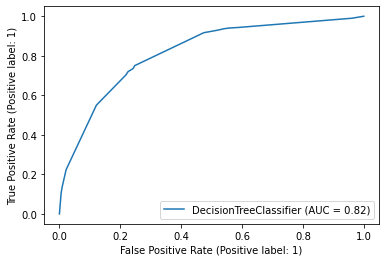

In [7]:
plot_roc_curve(clf1, x, y)

### Q2] Visualisation of Tree using graphviz

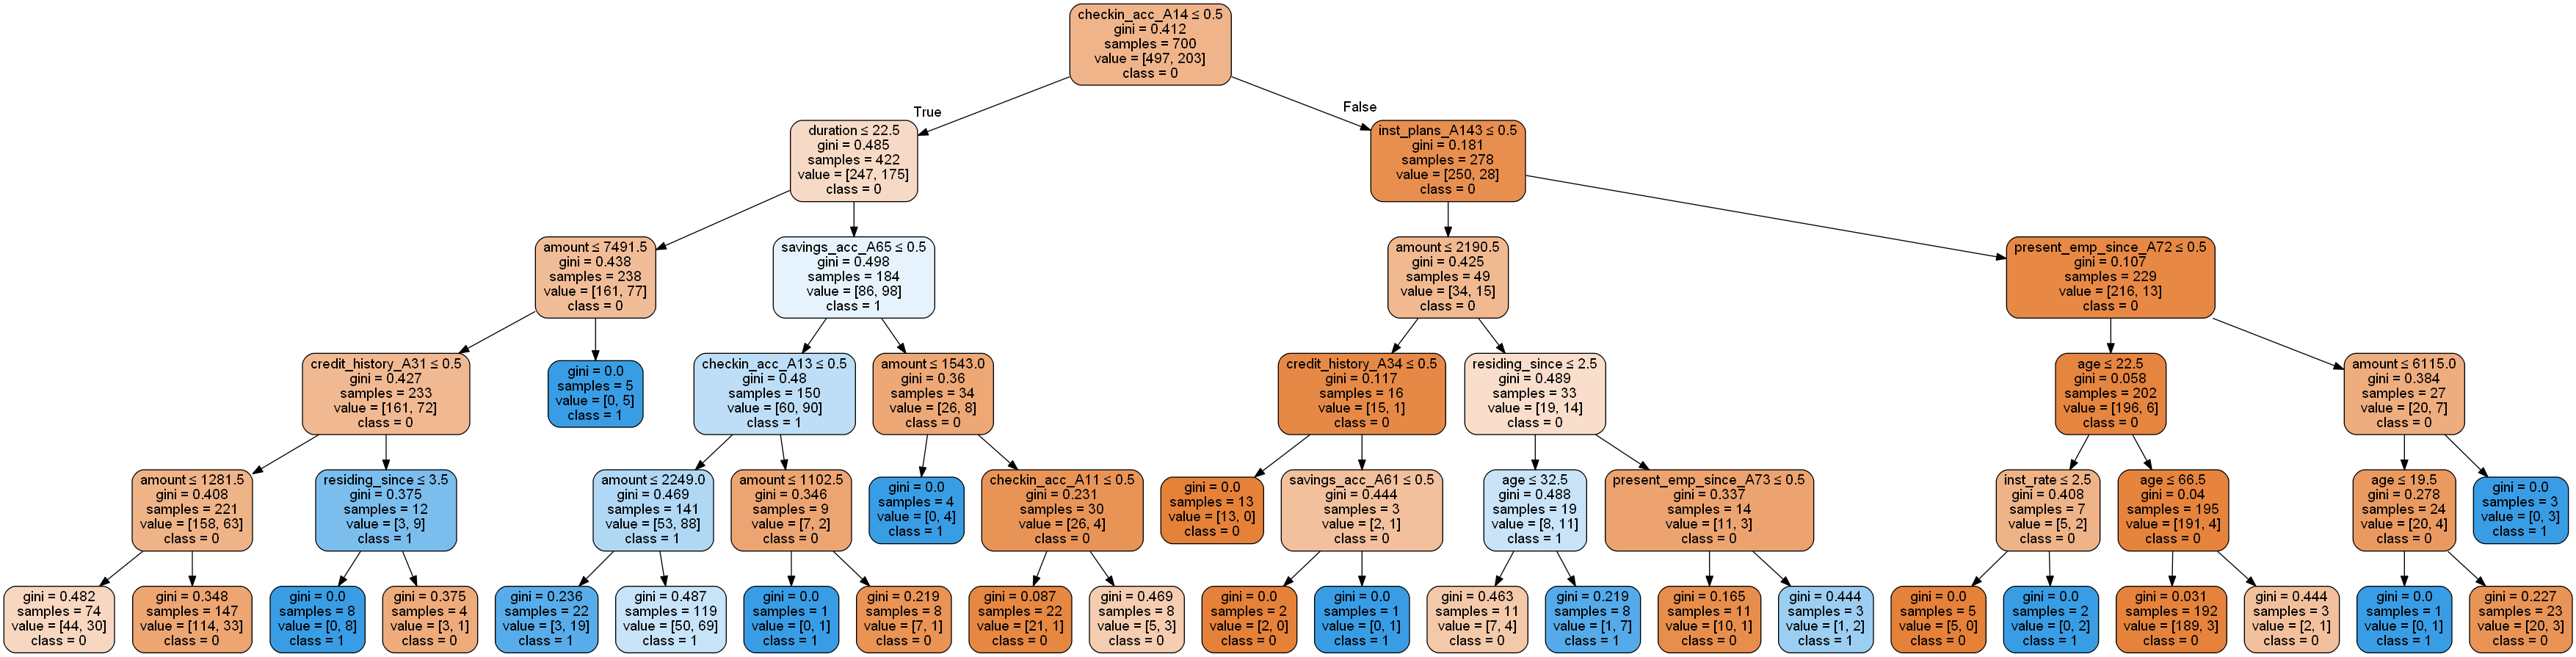

In [8]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit.png')
Image(graph.create_png())

### Q3] Textual Representation of rules learnt

In [9]:
print(tree.export_text(clf1,feature_names = list(x.columns)))

|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 22.50
|   |   |--- amount <= 7491.50
|   |   |   |--- credit_history_A31 <= 0.50
|   |   |   |   |--- amount <= 1281.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1281.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- credit_history_A31 >  0.50
|   |   |   |   |--- residing_since <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- residing_since >  3.50
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  7491.50
|   |   |   |--- class: 1
|   |--- duration >  22.50
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- checkin_acc_A13 <= 0.50
|   |   |   |   |--- amount <= 2249.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  2249.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- checkin_acc_A13 >  0.50
|   |   |   |   |--- amount <= 1102.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  1102.50
|   |   |   |   |   |--- class: 0
|   |   |--- savings_acc_A65